<a href="https://colab.research.google.com/github/mickeykubo/fastai-v1/blob/master/lesson3_camvid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image segmentation with CamVid


CamVidデータによる画像分類（セグメンテーション）

In [1]:
!pip3 install https://download.pytorch.org/whl/cu80/torch-1.0.0-cp36-cp36m-linux_x86_64.whl
!pip3 install torchvision
!pip3 install fastai
!pip3 install Pillow==4.1.1

    100% |████████████████████████████████| 2.0MB 10.4MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


  Stored in directory: /root/.cache/pip/wheels/48/5d/04/22361a593e70d23b1f7746d932802efe1f0e523376a74f321e
Successfully built wrapt
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
  Found existing installation: wrapt 1.11.1
    Uninstalling wrapt-1.11.1:
      Successfully uninstalled wrapt-1.11.1
    100% |████████████████████████████████| 5.7MB 7.7MB/s 
  Found existing installation: Pillow 5.4.1
    Uninstalling Pillow-5.4.1:
      Successfully uninstalled Pillow-5.4.1


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.callbacks.hooks import *
#torch.cuda.set_device(1)

In [0]:
# This data is too large! 
path = untar_data(URLs.CAMVID)
path.ls()

[PosixPath('/root/.fastai/data/camvid/labels'),
 PosixPath('/root/.fastai/data/camvid/images'),
 PosixPath('/root/.fastai/data/camvid/valid.txt'),
 PosixPath('/root/.fastai/data/camvid/codes.txt')]

## Subset classes

In [0]:
camvid = untar_data(URLs.CAMVID_TINY)
path_lbl = camvid/'labels'
path_img = camvid/'images'

In [8]:
camvid

PosixPath('/root/.fastai/data/camvid_tiny')

In [12]:
camvid.ls()

[PosixPath('/root/.fastai/data/camvid_tiny/codes.txt'),
 PosixPath('/root/.fastai/data/camvid_tiny/images'),
 PosixPath('/root/.fastai/data/camvid_tiny/labels')]

In [9]:
codes = np.loadtxt(camvid/'codes.txt', dtype=str); codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [11]:
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'
get_y_fn

<function __main__.<lambda>>

In [0]:
data = (SegmentationItemList.from_folder(path_img)
        .random_split_by_pct()
        .label_from_func(get_y_fn, classes=codes)
        .transform(get_transforms(), tfm_y=True, size=128)
        .databunch())

In [14]:
data

ImageDataBunch;

Train: LabelList
y: SegmentationLabelList (80 items)
[ImageSegment (1, 96, 128), ImageSegment (1, 96, 128), ImageSegment (1, 96, 128), ImageSegment (1, 96, 128), ImageSegment (1, 96, 128)]...
Path: /root/.fastai/data/camvid_tiny/images
x: SegmentationItemList (80 items)
[Image (3, 96, 128), Image (3, 96, 128), Image (3, 96, 128), Image (3, 96, 128), Image (3, 96, 128)]...
Path: /root/.fastai/data/camvid_tiny/images;

Valid: LabelList
y: SegmentationLabelList (20 items)
[ImageSegment (1, 96, 128), ImageSegment (1, 96, 128), ImageSegment (1, 96, 128), ImageSegment (1, 96, 128), ImageSegment (1, 96, 128)]...
Path: /root/.fastai/data/camvid_tiny/images
x: SegmentationItemList (20 items)
[Image (3, 96, 128), Image (3, 96, 128), Image (3, 96, 128), Image (3, 96, 128), Image (3, 96, 128)]...
Path: /root/.fastai/data/camvid_tiny/images;

Test: None

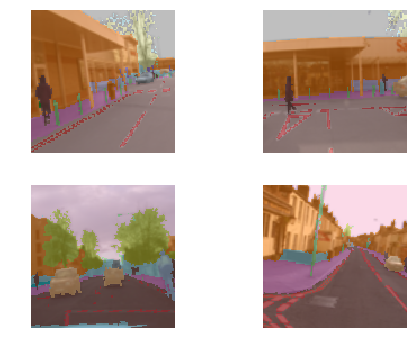

In [15]:
data.show_batch(rows=2, figsize=(7,5))

In [0]:
#path = Path('./data/camvid-tiny')
#def get_y_fn(x): return Path(str(x.parent)+'annot')/x.name

#codes = array(['Sky', 'Building', 'Pole', 'Road', 'Sidewalk', 'Tree',
 #    'Sign', 'Fence', 'Car', 'Pedestrian', 'Cyclist', 'Void'])

#src = (SegmentationItemList.from_folder(path)
  #      .split_by_folder(valid='val')
  #     .label_from_func(get_y_fn, classes=codes))

#bs=8
#data = (src.transform(get_transforms(), tfm_y=True)
#        .databunch(bs=bs)
 #       .normalize(imagenet_stats))

## Data

In [16]:
fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('/root/.fastai/data/camvid_tiny/images/0016E5_08089.png'),
 PosixPath('/root/.fastai/data/camvid_tiny/images/0001TP_007500.png'),
 PosixPath('/root/.fastai/data/camvid_tiny/images/Seq05VD_f04530.png')]

In [17]:
lbl_names = get_image_files(path_lbl)
lbl_names[:3]

[PosixPath('/root/.fastai/data/camvid_tiny/labels/Seq05VD_f04950_P.png'),
 PosixPath('/root/.fastai/data/camvid_tiny/labels/0016E5_06810_P.png'),
 PosixPath('/root/.fastai/data/camvid_tiny/labels/0016E5_08280_P.png')]

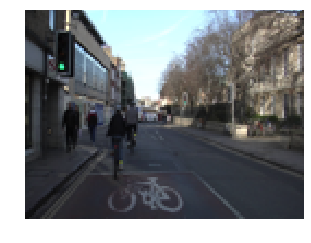

In [18]:
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(5,5))

In [0]:
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

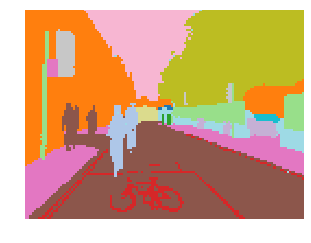

In [19]:
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5), alpha=1)

In [20]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([ 96, 128]), tensor([[[ 4,  4,  4,  ..., 26, 26, 26],
          [ 4,  4,  4,  ..., 26, 26, 26],
          [ 4,  4,  4,  ..., 26, 26, 26],
          ...,
          [19, 19, 19,  ..., 17, 17, 17],
          [19, 19, 17,  ..., 17, 17, 17],
          [19, 19, 17,  ..., 17, 17, 17]]]))

In [0]:
#codes = np.loadtxt(path/'codes.txt', dtype=str); codes

## Datasets

In [0]:
size = src_size//2
bs=8

In [0]:
#src = (SegmentationItemList.from_folder(path_img)
#       .split_by_fname_file('../valid.txt')
#       .label_from_func(get_y_fn, classes=codes))

In [0]:
#data = (src.transform(get_transforms(), size=size, tfm_y=True)
 #       .databunch(bs=bs)
 #       .normalize(imagenet_stats))

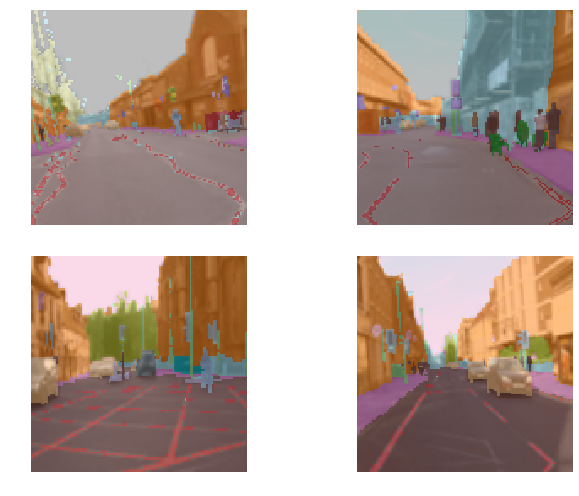

In [27]:
data.show_batch(2, figsize=(10,7))

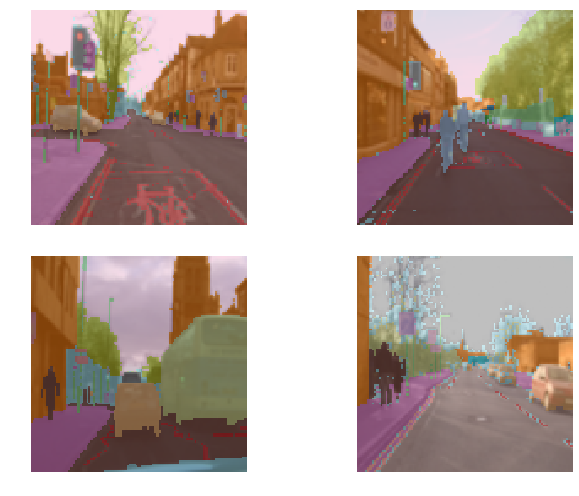

In [28]:
data.show_batch(2, figsize=(10,7), ds_type=DatasetType.Valid)

## Model

resnet34をもとにした，unetで画像セグメンテーションを行う．

In [0]:
name2id = {v:k for k,v in enumerate(codes)}
void_code = name2id['Void']

def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [0]:
metrics=acc_camvid
# metrics=accuracy

In [0]:
wd=1e-2

In [32]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 97922836.94it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


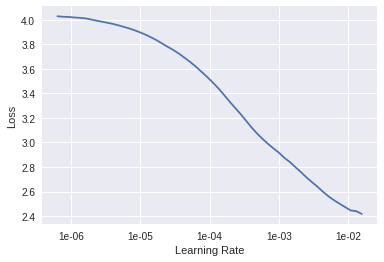

In [33]:
#lr_find(learn)
learn.lr_find()
learn.recorder.plot()

In [0]:
lr=3e-3

In [36]:
learn.fit_one_cycle(10, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,acc_camvid
1,4.025442,3.317684,0.144211
2,3.703342,3.208612,0.313279
3,3.490518,2.966783,0.344038
4,3.302829,7.496100,0.306469
5,4.074976,3.064385,0.184461
6,3.845980,2.945051,0.157396
7,3.651307,2.829160,0.321000
8,3.490687,3.488898,0.308149
9,3.544396,2.858080,0.316673
10,3.420402,2.923722,0.168072


In [0]:
!nvidia-smi

Wed Jan 16 05:33:18 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.44                 Driver Version: 396.44                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    71W / 149W |   9515MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [37]:
gc.collect()

24709

In [0]:
learn.save('stage-1')

In [0]:
learn.load('stage-1');

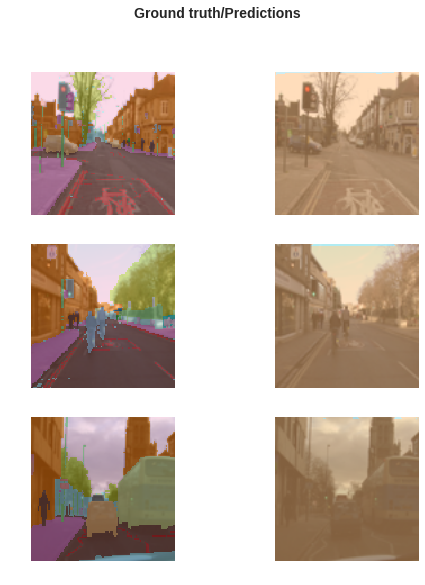

In [39]:
learn.show_results(rows=3, figsize=(8,9))

In [0]:
learn.unfreeze()

In [0]:
lrs = slice(lr/400,lr/4)

In [42]:
learn.fit_one_cycle(12, lrs, pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid
1,2.581204,2.884655,0.171696
2,2.548954,2.838773,0.176420
3,2.509800,2.781122,0.223779
4,2.473641,2.719593,0.320653
5,2.444217,2.635952,0.338917
6,2.399065,2.406467,0.362356
7,2.327140,2.541561,0.356236
8,2.336077,2.190182,0.483346
9,2.272290,2.291950,0.423807
10,2.228831,2.233046,0.379111


In [0]:
learn.save('stage-2');

## Go big

You may have to restart your kernel and come back to this stage if you run out of memory, and may also need to decrease `bs`.

In [0]:
size = src_size
bs=3

In [45]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

NameError: ignored

In [0]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

In [0]:
learn.load('stage-2');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


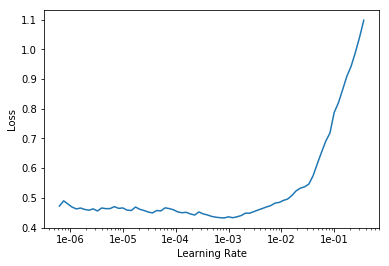

In [0]:
lr_find(learn)
learn.recorder.plot()

In [0]:
lr=1e-3

In [0]:
learn.fit_one_cycle(10, slice(lr), pct_start=0.8)

Total time: 15:41
epoch  train_loss  valid_loss  acc_camvid
1      0.382982    0.337384    0.904437    (01:40)
2      0.363525    0.312738    0.913709    (01:33)
3      0.345842    0.281208    0.918837    (01:33)
4      0.332908    0.315401    0.911936    (01:33)
5      0.337121    0.315564    0.911719    (01:33)
6      0.326914    0.283248    0.919347    (01:33)
7      0.311748    0.303021    0.913213    (01:33)
8      0.312433    0.264381    0.925357    (01:33)
9      0.274042    0.265071    0.921500    (01:33)
10     0.244084    0.239709    0.931215    (01:33)



In [0]:
learn.save('stage-1-big')

In [0]:
learn.load('stage-1-big');

In [0]:
learn.unfreeze()

In [0]:
lrs = slice(1e-6,lr/10)

In [0]:
learn.fit_one_cycle(10, lrs)

Total time: 16:49
epoch  train_loss  valid_loss  acc_camvid
1      0.224315    0.243748    0.929659    (01:39)
2      0.233819    0.256230    0.925163    (01:41)
3      0.216598    0.248363    0.929304    (01:41)
4      0.217467    0.242487    0.930903    (01:41)
5      0.221290    0.247053    0.930387    (01:41)
6      0.208421    0.249250    0.929263    (01:41)
7      0.202845    0.240715    0.931511    (01:41)
8      0.197734    0.244688    0.930260    (01:41)
9      0.195650    0.249368    0.929931    (01:40)
10     0.192460    0.248666    0.929322    (01:41)



In [0]:
learn.save('stage-2-big')

In [0]:
learn.load('stage-2-big')

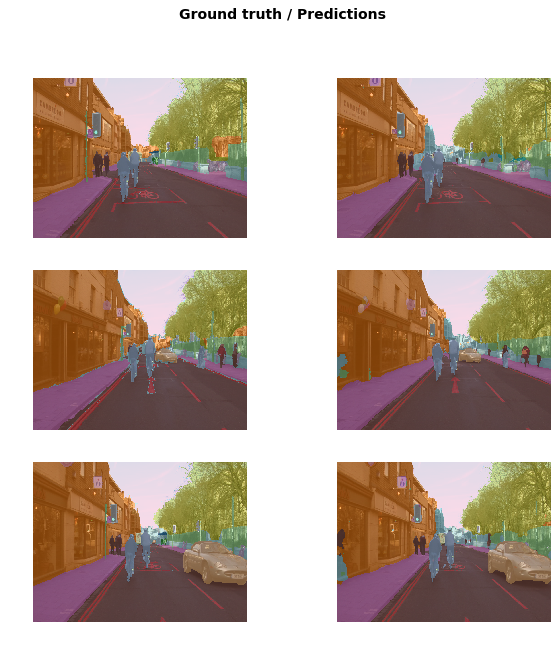

In [0]:
learn.show_results(rows=3, figsize=(10,10))

## fin